In [1]:
import warnings

import cv2
import matplotlib.pyplot as plt

from da_od.config import class_names, sam_weights, test_img
from da_od.model import DepthAnythingEstimator, MiDaSEstimator, MonocularDepthEstimator, SegmentDetection

image_path = test_img / "A02.jpg"
CLASS_NAME_PATH = class_names / "coco.names.txt"
CHECKPOINT_PATH = sam_weights / "sam_vit_h_4b8939.pth"

warnings.filterwarnings("ignore", message=".*")

[2024-03-07 18:54:27] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /Users/maryam/sg_logs/console.log


[2024-03-07 18:54:27] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-03-07 18:54:27,359] torch.distributed.elastic.multiprocessing.redirects: [WARNING] NOTE: Redirects are currently not supported in Windows or MacOs.
[2024-03-07 18:54:30] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-03-07 18:54:30] WARNING - export.py - Failed to import pytorch_quantization
[2024-03-07 18:54:30] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-03-07 18:54:30] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


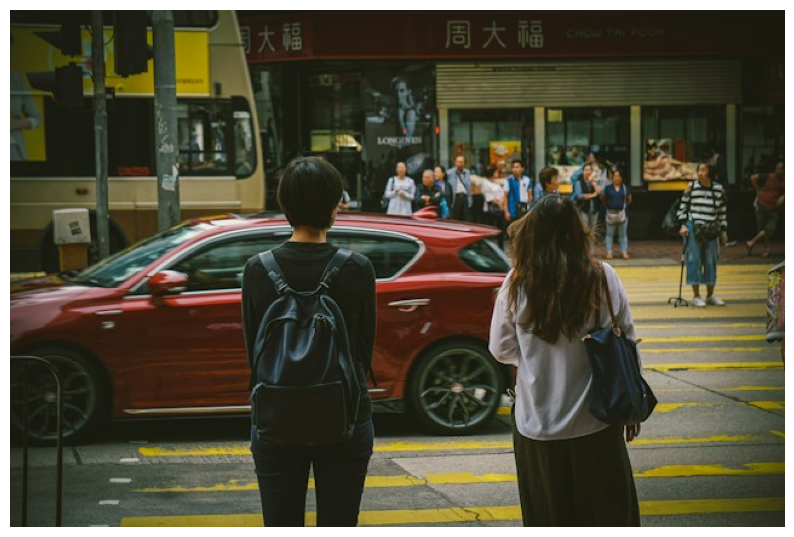

In [2]:
img = cv2.imread(str(image_path))

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2024-03-07 18:54:53] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-07 18:54:53] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-03-07 18:54:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


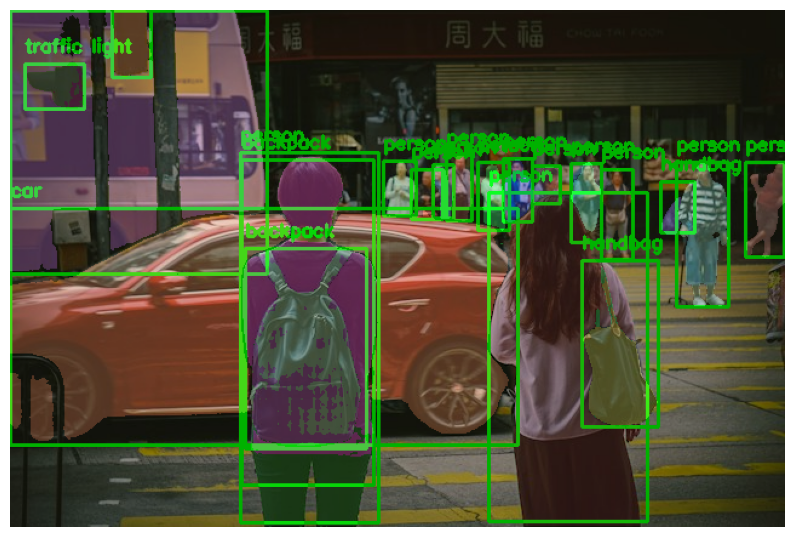

In [3]:
segment_detector = SegmentDetection(CLASS_NAME_PATH, CHECKPOINT_PATH)
segment_detector.configure_object_detector()
segment_detector.detect_and_segment(image_path)

[2024-03-07 18:55:24] WARNING - attention.py - xFormers not available
[2024-03-07 18:55:24] WARNING - block.py - xFormers not available
[2024-03-07 18:55:24] INFO - vision_transformer.py - using MLP layer as FFN


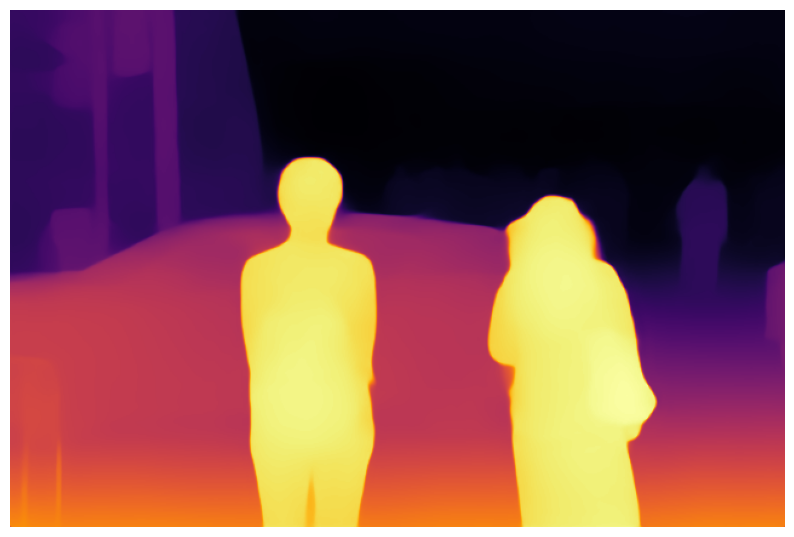

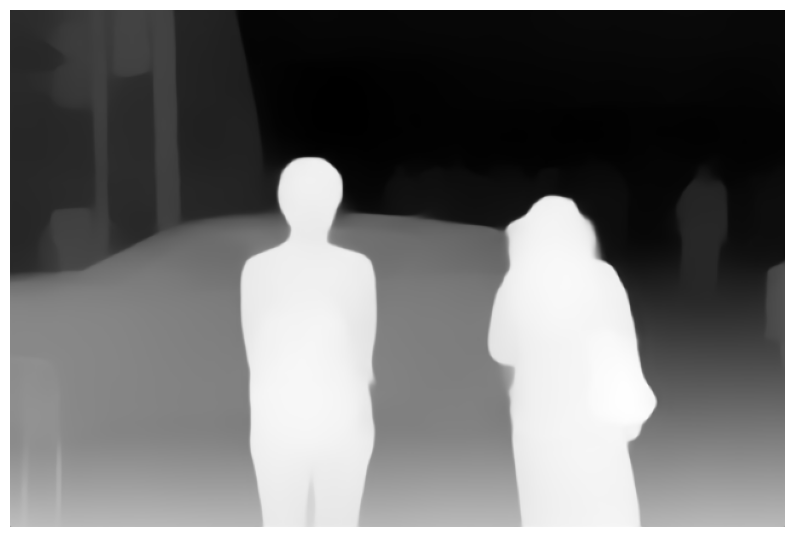

In [4]:
DepthAnything_estimator = DepthAnythingEstimator(image_path, encoder="vits")
DepthAnything_colored, DepthAnything_raw = DepthAnything_estimator.process_image()

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(DepthAnything_colored, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(DepthAnything_raw, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2024-03-07 18:55:52] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-07 18:55:52] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-03-07 18:55:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


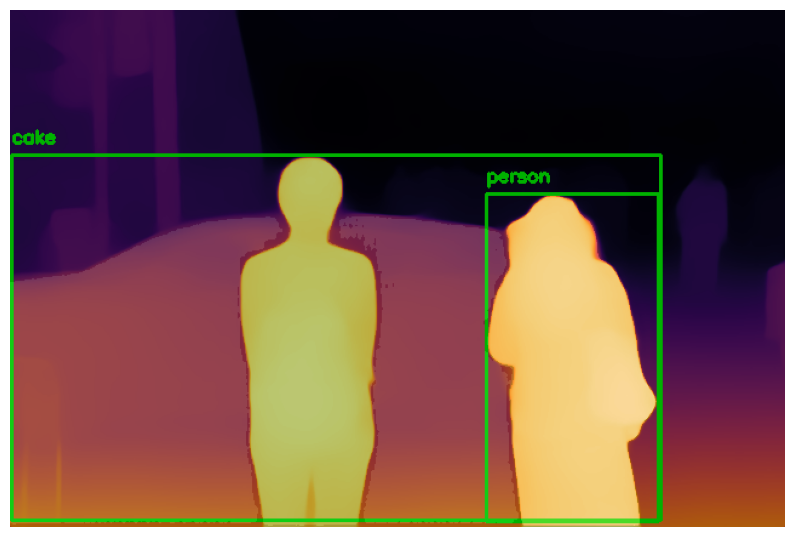

In [5]:
segment_detector = SegmentDetection(CLASS_NAME_PATH, CHECKPOINT_PATH)
segment_detector.configure_object_detector()
segment_detector.detect_and_segment(DepthAnything_colored)

[2024-03-07 18:56:51] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-07 18:56:52] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-03-07 18:56:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


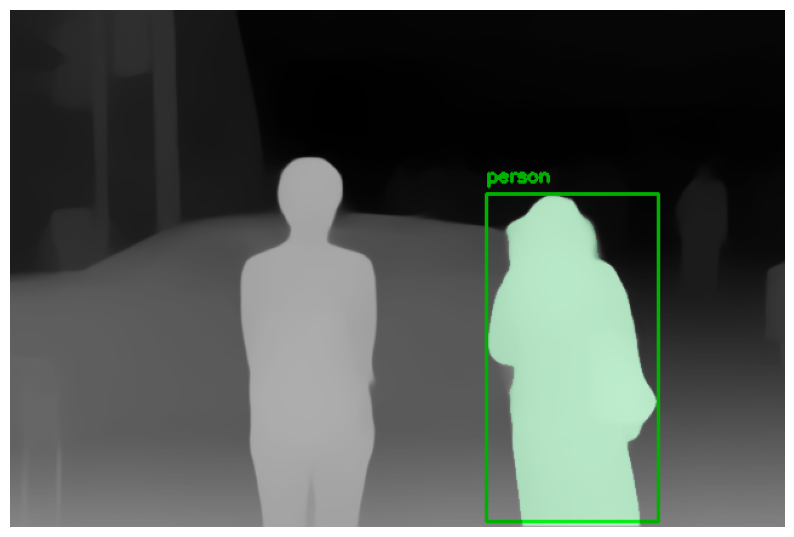

In [6]:
segment_detector = SegmentDetection(CLASS_NAME_PATH, CHECKPOINT_PATH)
segment_detector.configure_object_detector()
segment_detector.detect_and_segment(DepthAnything_raw)

Using cache found in /Users/maryam/.cache/torch/hub/intel-isl_MiDaS_master


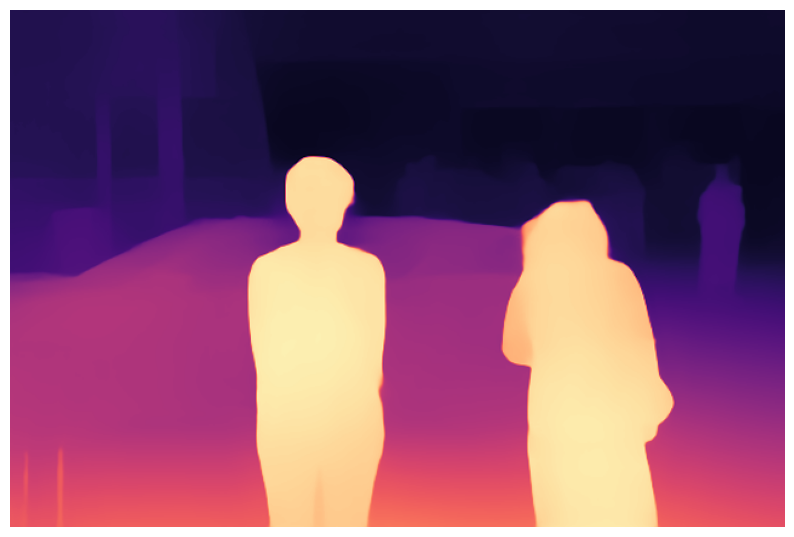

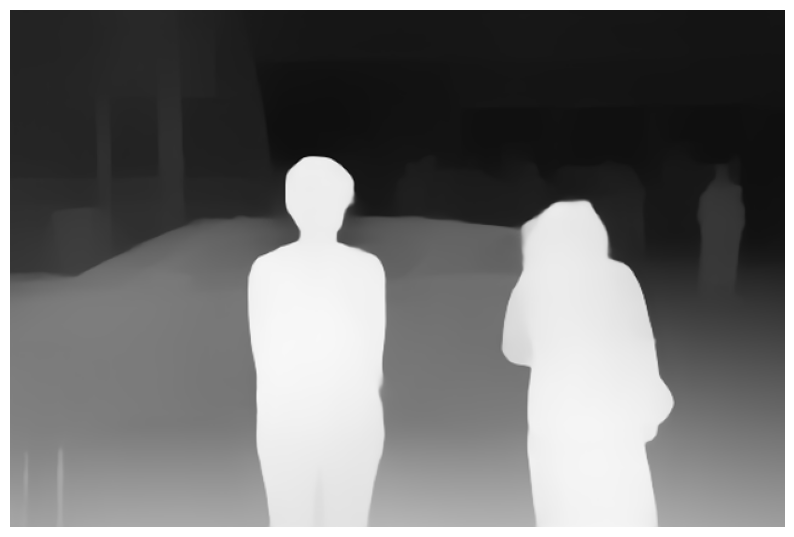

In [7]:
MiDaS_estimator = MiDaSEstimator(image_path, model_type="DPT_Large")
MiDaS_colored, MiDaS_raw = MiDaS_estimator.process_image()

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(MiDaS_colored, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(MiDaS_raw, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2024-03-07 18:58:15] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-07 18:58:15] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-03-07 18:58:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


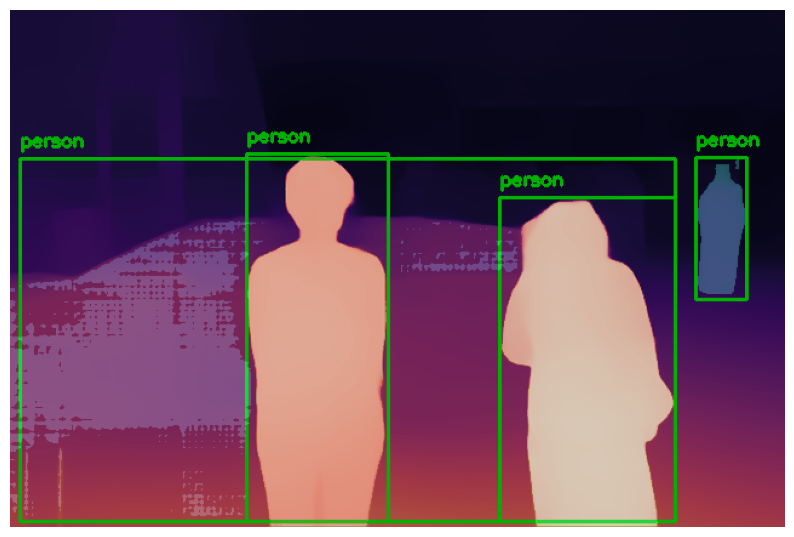

In [8]:
segment_detector = SegmentDetection(CLASS_NAME_PATH, CHECKPOINT_PATH)
segment_detector.configure_object_detector()
segment_detector.detect_and_segment(MiDaS_colored)

[2024-03-07 18:59:16] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-07 18:59:16] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-03-07 18:59:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


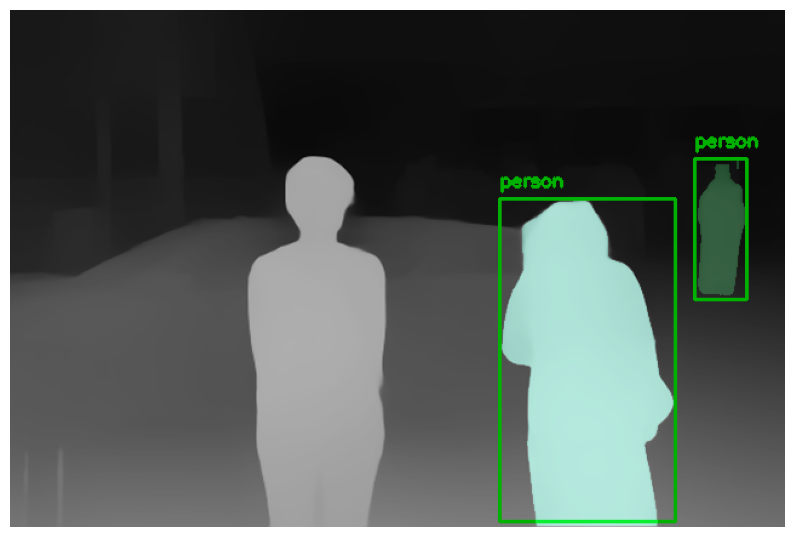

In [9]:
segment_detector = SegmentDetection(CLASS_NAME_PATH, CHECKPOINT_PATH)
segment_detector.configure_object_detector()
segment_detector.detect_and_segment(MiDaS_raw)

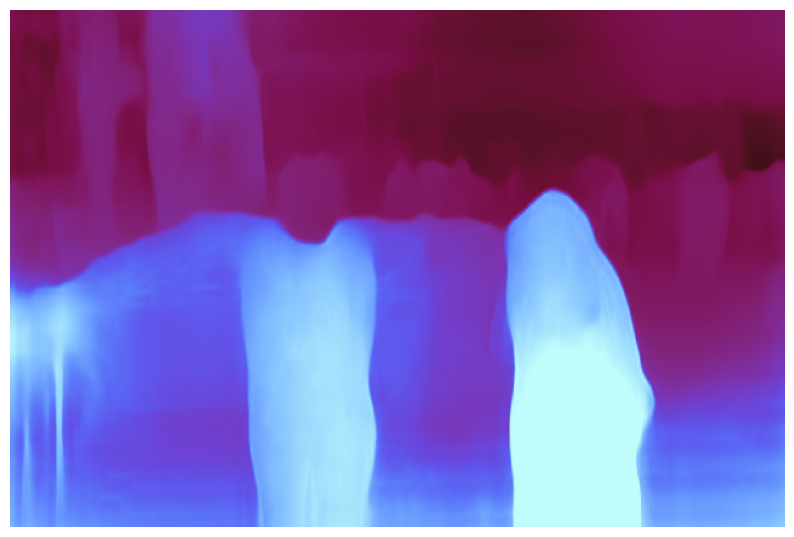

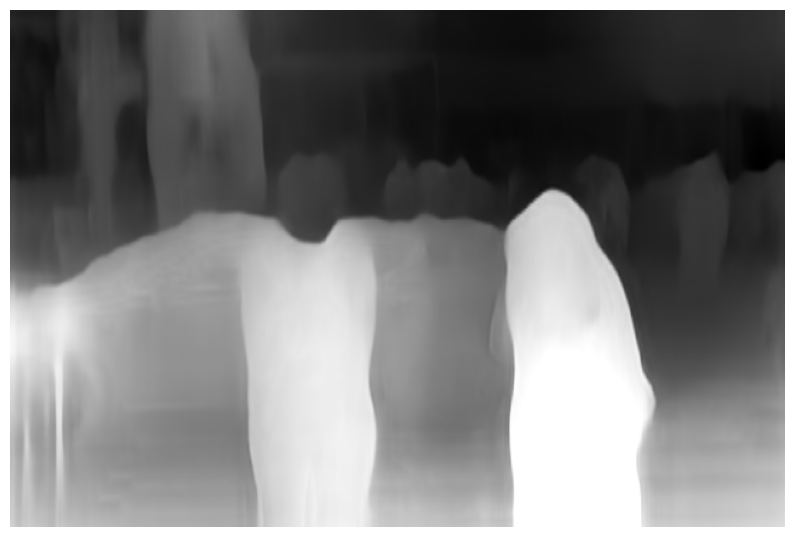

In [10]:
Monocular_estimator = MonocularDepthEstimator(image_path, model_name="mono_640x192")
Monocular_colored, Monocular_raw = Monocular_estimator.process_image()

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(Monocular_colored, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(Monocular_raw, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

[2024-03-07 19:00:18] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-07 19:00:19] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-03-07 19:00:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


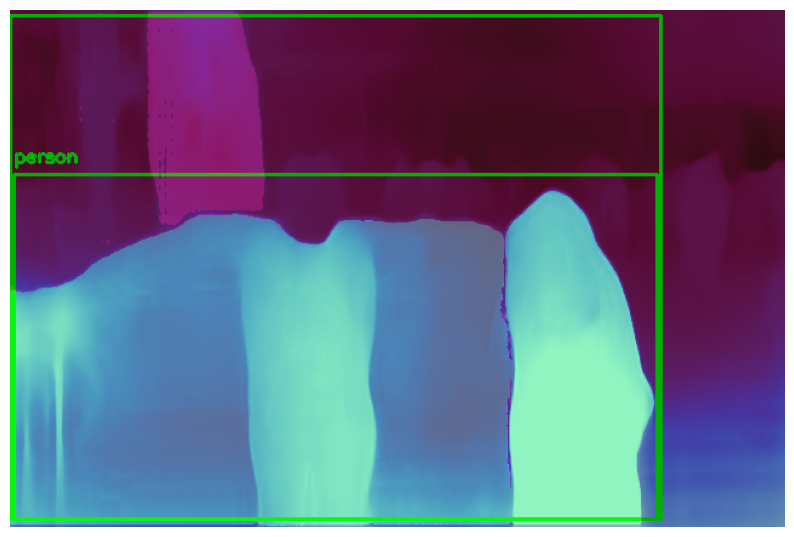

In [11]:
segment_detector = SegmentDetection(CLASS_NAME_PATH, CHECKPOINT_PATH)
segment_detector.configure_object_detector()
segment_detector.detect_and_segment(Monocular_colored)

[2024-03-07 19:01:22] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-07 19:01:22] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2024-03-07 19:01:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


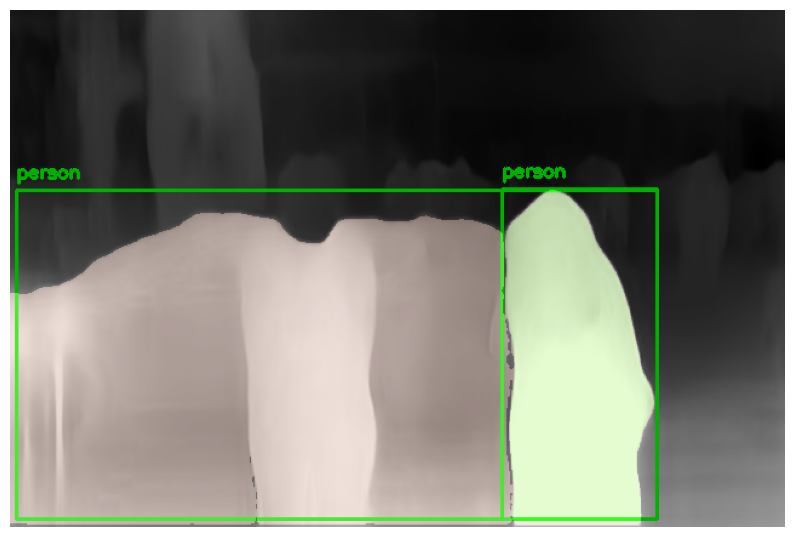

In [12]:
segment_detector = SegmentDetection(CLASS_NAME_PATH, CHECKPOINT_PATH)
segment_detector.configure_object_detector()
segment_detector.detect_and_segment(Monocular_raw)